In [1]:
import warnings
import numpy as np
from numpy.linalg import matrix_rank
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Data
boston = datasets.load_boston()
print(boston.keys())
print("\nBoston dataset shape: ", boston.data.shape)
print("Boston target shape: ", boston.target.shape)
print("\nFeature names: ", boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Boston dataset shape:  (506, 13)
Boston target shape:  (506,)

Feature names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

In [3]:
# Create Dataframe Object
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df = pd.concat([df, pd.Series(boston.target, name="MEDV")], axis=1)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


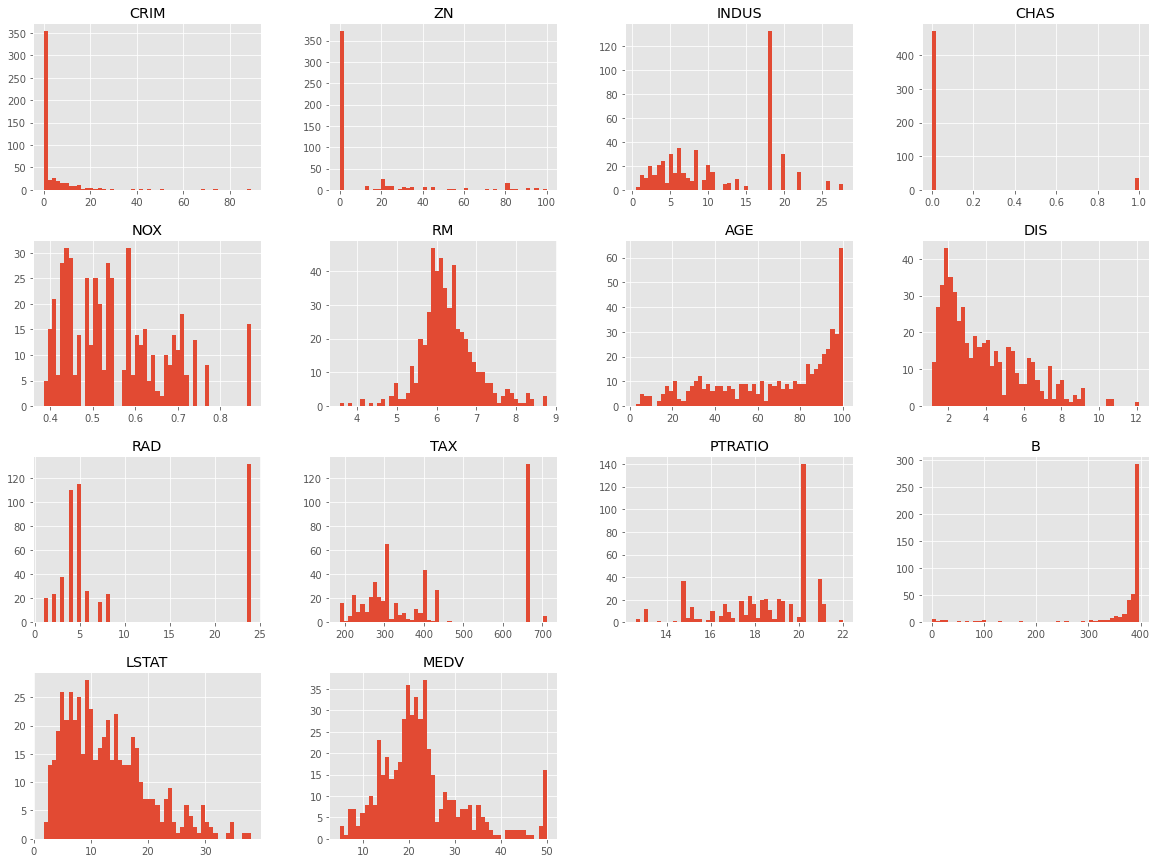

In [6]:
# Visualization of Data

plt.style.use('ggplot')
df.hist(bins=50, figsize=(20,15))
plt.show()

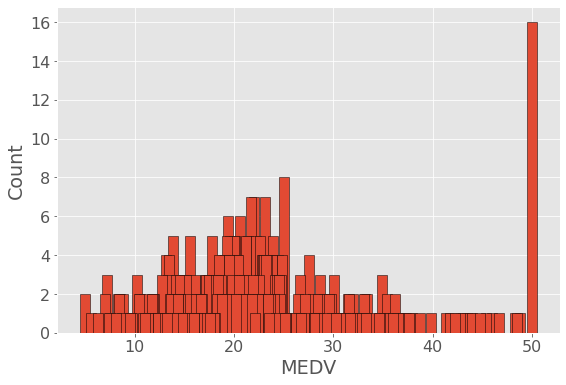

In [7]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9,6)

plt.bar(df['MEDV'].value_counts().index, 
        df['MEDV'].value_counts().values,
        fill = 'navy', edgecolor='k', width=1)
plt.xlabel('MEDV')
plt.ylabel('Count')
#plt.xticks([])
plt.show()

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

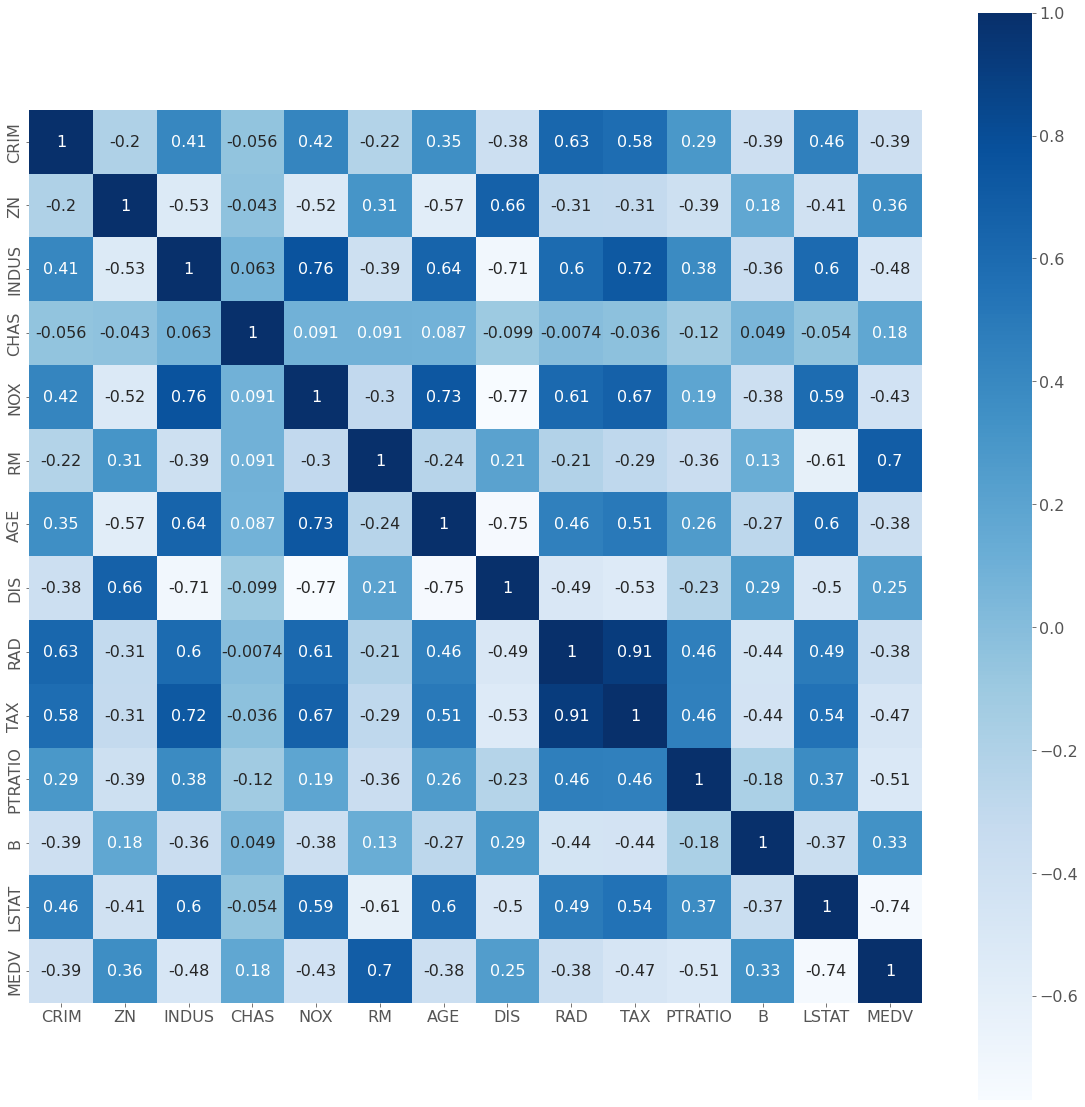

In [11]:
correlation = df.corr()

fig = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')
plt.show()

In [12]:
allData = df.copy()

X = df.drop(columns='MEDV')
y = df['MEDV']

X = np.asarray(X)
y = np.asarray(y)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

X shape:  (506, 13)
y shape:  (506,)

X data type:  float64
y data type:  float64


In [13]:
# Determine Whether the Data Matrix X is Sigular 
print("Rank of X: ", matrix_rank(X))

Rank of X:  13


In [14]:
# Create Train and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the Feature
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## OLS Method for solving LR

In [16]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print("Intercept: ", lin_reg.intercept_)
print("Coefficeints: ", lin_reg.coef_)

y_train_predicted = lin_reg.predict(X_train)
print("Training: Mean Squared error: ", mean_squared_error(y_train, y_train_predicted))
print("Training: r^2 variance error: ", r2_score(y_train, y_train_predicted))

Intercept:  22.796534653465375
Coefficeints:  [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Training: Mean Squared error:  21.641412753226316
Training: r^2 variance error:  0.7508856358979672


In [17]:
# Evaluation of the model on Testing
y_test_predicted = lin_reg.predict(X_test)

print("Testing: Mean Squared error: ", mean_squared_error(y_test, y_test_predicted))
print("Testing: r^2 variance error: ", r2_score(y_test, y_test_predicted))

Testing: Mean Squared error:  24.29111947497351
Testing: r^2 variance error:  0.6687594935356321


In [18]:
# Ridge Regression

ridge_alpha = 1.0
lin_reg_ridge = Ridge(alpha=ridge_alpha)
lin_reg_ridge.fit(X_train, y_train)

print("Intercept: ", lin_reg_ridge.intercept_)
print("Coefficients", lin_reg_ridge.coef_)
print("No of Iterations: ", lin_reg_ridge.n_iter_)
print("-------------------MODEL EVALUATION---------------------")

y_train_predicted_ridge = lin_reg_ridge.predict(X_train)
print("Training: Mean squared error: %.2f"% mean_squared_error(y_train, y_train_predicted_ridge))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_ridge))

Intercept:  22.796534653465375
Coefficients [-0.99218679  0.6777488   0.2522143   0.72248078 -1.99083465  3.15157218
 -0.17726162 -3.04502895  2.17324941 -1.69555879 -2.02783351  1.127197
 -3.59897667]
No of Iterations:  None
-------------------MODEL EVALUATION---------------------
Training: Mean squared error: 21.64
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [19]:
# Make prediction 
y_test_predicted = lin_reg_ridge.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, y_test_predicted)

print("Test: Mean squared error: %.2f" % ridge_test_mse)


# Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test, y_test_predicted))

Test: Mean squared error: 24.31
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [20]:
# Hyperparameter tuning

param_grid = {'alpha':[0.001,0.01,0.1,1],
              'l1_ratio':[0,0.2,0.5,0.8,1.0],
              'max_iter':[100,400,1000]}

enet = ElasticNet()

enet_cv = GridSearchCV(enet, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=2,  cv=10, n_jobs=-1)
enet_cv.fit(X_train, y_train)

params_optimal_enet = enet_cv.best_params_

print("Best Score (negative mean squared error): %f" % enet_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_enet)
print("\n")

Fitting 10 folds for each of 60 candidates, totalling 600 fits


/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+03, tolerance: 3.240e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.025e+03, tolerance: 3.150e+00 Linear regression models with null weight for the l1 regularization term are more effic

[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0, max_iter=400; total time=   0.0s
[CV] END ..............alpha

/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.900e+03, tolerance: 3.013e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.188e+03, tolerance: 3.240e+00 Linear regression models with null weight for the l1 regularization term are more effic

[CV] END .............alpha=0.1, l1_ratio=0.5, max_iter=1000; total time=   0.0s
[CV] END ...............alpha=0.1, l1_ratio=0, max_iter=1000; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=400; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=100; total time=   0.0s
[CV] END ..............alpha=0.1, l1_ratio=0.8, max_iter=400; total time=   0.0s
[CV] END ..............alpha

/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.666e+03, tolerance: 3.222e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.898e+03, tolerance: 3.240e+00 Linear regression models with null weight for the l1 regularization term are more effic

In [21]:
lin_reg_enet = ElasticNet(**params_optimal_enet)
lin_reg_enet.fit(X_train, y_train)
print(lin_reg_enet.intercept_)
print(lin_reg_enet.coef_)
print(lin_reg_enet.n_iter_)

22.796534653465375
[-0.96491488  0.6278797   0.18379476  0.73233675 -1.90142863  3.16742309
 -0.180132   -2.93933801  1.96632085 -1.51045811 -1.99959607  1.12009486
 -3.56219734]
1000


/Users/iman/.conda/envs/DataScience/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.473e+03, tolerance: 3.510e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [22]:
print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)


print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))


# Explained variance score: 1 is perfect prediction
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_enet))


----------------------------- Model Evaluation -----------------------------
Training: Mean squared error: 21.66
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75
